# Problem Solving Session 8
## Topic: Lecture 5 - Functions, iterators and generators
##### Date: February 20, 2021
##### By: Hermine Grigoryan

## Imports

In [24]:
from functools import reduce
import sys
import math

## Exercise 1
Calculate the square of the numbers in the list then add 2 to each one using:

1. for loop + enumerate
2. while loop
3. map + lambda
4. list comprehension

In [33]:
ls = [2,4,6,8,10]
id(ls)

1954868285824

In [34]:
for ind, i in enumerate(ls):
    ls[ind] = i**2 +2
print(ls)
id(ls)

[6, 18, 38, 66, 102]


1954868285824

In [35]:
ls = [2,4,6,8,10]

i = 0
while i < len(ls):
    ls[i] = ls[i]**2 +2
    i += 1
ls

[6, 18, 38, 66, 102]

In [36]:
ls = [2,4,6,8,10]
list(map(lambda x: x**2+2, ls))

[6, 18, 38, 66, 102]

In [37]:
ls = [2,4,6,8,10]
[i**2+2 for i in ls]

[6, 18, 38, 66, 102]

##### Iterables
- Examples: lists, strings, dictionaries
- An object with an associated `iter()` method
- Applying `iter()` to an iterable creates an *iterator*

##### Iterator
- Produces next value with `next()`

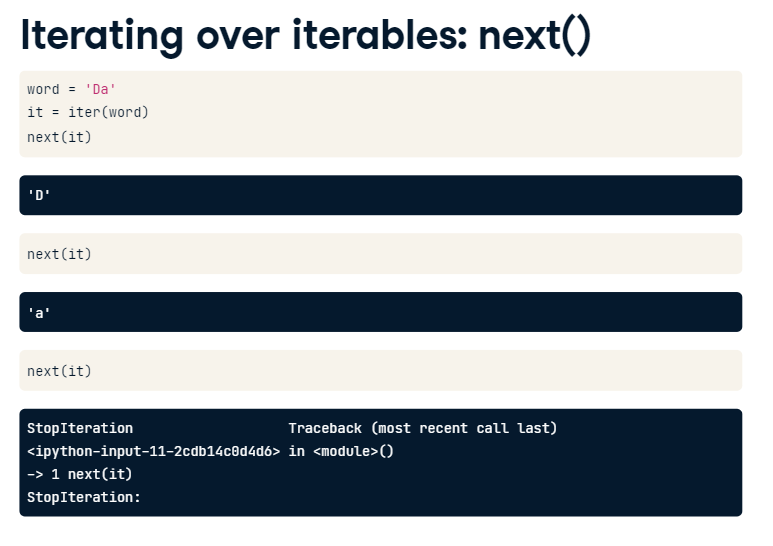


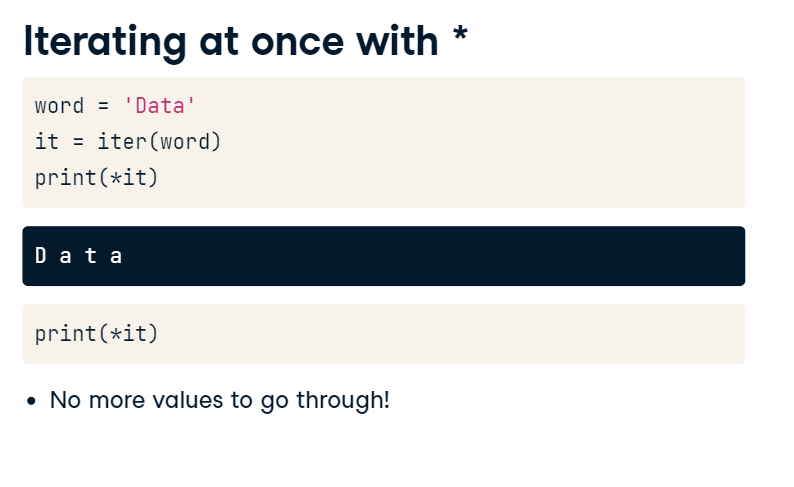

## Exercise 2
Create a function which will check whether an object in the provided list is iterable or not.

In [38]:
list_of_values = [34, [4, 5], (4, 5), {"a":4}, "dfsdf", 4.5]

In [39]:
def is_iterable(obj):
    try:
        iter(obj)
        return True
    except:
        return False

In [40]:
is_iterable('56473')

True

In [41]:
for i in list_of_values:
    print(f'{i} is iterable: {is_iterable(i)}')

34 is iterable: False
[4, 5] is iterable: True
(4, 5) is iterable: True
{'a': 4} is iterable: True
dfsdf is iterable: True
4.5 is iterable: False


About [generators.](https://www.pythonlikeyoumeanit.com/Module2_EssentialsOfPython/Generators_and_Comprehensions.html)

## Exercise 3
Write a generator that produces a range of floating-point numbers. Compute the sum of squares of numbers from 5.1 to 9.3 with a step=0.1.

In [42]:
def float_range(start, stop, step):
    num = start
    while num<stop:
        yield num
        num = num+step

In [43]:
sum(list(float_range(5.1, 9.3, 0.1)))

309.5999999999997

In [44]:
sum(float_range(5.1, 9.3, 0.1))

309.5999999999997

In [45]:
# Sum of squares
sum([i**2 for i in float_range(5.1, 9.3, 0.1)])

2295.339999999995

## Exercise 4
Write a function that accepts a number and returns the next number that is divisible by it.

In [46]:
def next_num(num):
    i = num+1
    while True:
        if i % num == 0:
            yield(i)
        i += 1 

In [48]:
it = next_num(5)
print(next(it))
print(next(it))

10
15


## Exercise 5
Write a function that returns a generator that yields in the next prime numbers until 500.

In [113]:
# A function which checks whether a number is prime

# Method 1 - The fastest way: we can test only the numbers up to the square root of that number to identify whether it is prime or not
def is_prime(num):
    cnt = 0
    for i in range(1, int(math.sqrt(num))+1): 
        if num % i == 0:
            cnt += 1
    if cnt == 1: # if the counter is 1 this means that the number is divisible only by 1
        return True
    else:
        return False
print(f'Method 1: 2:{is_prime(2)}, 10:{is_prime(10)}, 5:{is_prime(5)}')
    
    
# Method 2 (The same as method 1, suggested by Esmila)  
def is_prime(num):
    cnt = 0
    for i in float_range(1, math.sqrt(num) + 0.1, 1):
        if num % i == 0:
            cnt += 1
       
    if cnt == 1:
        return True
    else:
        return False

print(f'Method 2: 2:{is_prime(2)}, 10:{is_prime(10)}, 5:{is_prime(5)}')


# Method 3 - not taking into account the square root of the number
def is_prime(num):
    count = 0
    for i in range(1, num+1):
        if num%i == 0:
            count += 1
    if count == 2:
        return True
    else:
        return False
    
print(f'Method 3: 2:{is_prime(2)}, 10:{is_prime(10)}, 5:{is_prime(5)}')


# Method 4 - the same as method 3 with while loop 
def is_prime(num):
    i = 1
    n_divisors = 0
    while i <= num:
        if num % i == 0:
            n_divisors += 1
        i += 1
            
    if n_divisors == 2:
        output = True
    else:
        output = False
    return output
print(f'Method 4: 2:{is_prime(2)}, 10:{is_prime(10)}, 5:{is_prime(5)}')

Method 1: 2:True, 10:False, 5:True
Method 2: 2:True, 10:False, 5:True
Method 3: 2:True, 10:False, 5:True
Method 4: 2:True, 10:False, 5:True


In [114]:
def prime_numbers_in_range(start, stop):
    i = start
    while i<=stop:
        if is_prime(i):
            yield i
        i += 1

In [116]:
list(prime_numbers_in_range(400, 500))

[401,
 409,
 419,
 421,
 431,
 433,
 439,
 443,
 449,
 457,
 461,
 463,
 467,
 479,
 487,
 491,
 499]

## Exercise 6
Create a list and a generator comprehension with the tuples of the first 100 prime numbers, where the first element of the tuple is $number^2$, the second one $number^3$, and the third one $number^4$. Compare the sizes of the list and generator.

In [121]:
def get_first_n_prime(num):
    cnt = 0
    i = 2
    while cnt<num:
        if is_prime(i):
            cnt += 1
            yield i
        i += 1
# Check
list(get_first_n_prime(10))

In [118]:
%%time
ls = [(i**2, i**3, i**4) for i in get_first_n_prime(100)]

Wall time: 21.9 ms


In [119]:
%%time
gen_comp = ((i**2, i**3, i**4) for i in get_first_n_prime(100))

Wall time: 0 ns


In [120]:
print(sys.getsizeof(ls))
print(sys.getsizeof(gen_comp))

904
112


Finite harmonic series using generator expression/comprehension

In [16]:
%%time
sum(1/n for n in range(1, 10**8))

Wall time: 13.7 s


18.997896403852554

Finite harmonic series using list comprehension

In [17]:
%%time
sum([1/n for n in range(1, 10**8)])

Wall time: 33.6 s


18.997896403852554

## Additional exercises

Increase the following data scientists' salaries by 10 percent except for Lord Voldemort using dictionary comprehension.

In [ ]:
Data_Scientist={"Harry Potter":700, "Ron Weasley":650, "Lord Voldemort":900, "Hermione Granger":800, "Albus Dumbledore":1000}
dct={k:round(v*1.1) if k != "Lord Voldemort" else v for k,v in Data_Scientist.items()}
print(dct)

{'Harry Potter': 770, 'Ron Weasley': 715, 'Lord Voldemort': 900, 'Hermione Granger': 880, 'Albus Dumbledore': 1100}
